In [1]:
import glob
import os
import pandas as pd
import shutil
import orca_params
import datetime
import time
import numpy as np

In [2]:
import random
import IPython.display as ipd
import urllib

In [3]:
import  orca_params

In [4]:
from scipy.io import wavfile

## Define class to process input data from raw audio files and convert to dataframe

In [58]:
class MammalFind(object):

    def __init__(self):
        """
            Build a dictionary of labels to filenames
            Sort by labels and per label by audio duration
        """
        self.root_dir = '/data'
        fileList = [file for file in glob.glob(self.root_dir + '/*/*/*.wav')]
        fileList_map = list(map(self._extract_path_segments, fileList))
        self.file_df = pd.DataFrame(fileList_map)
        self.file_df.columns = ['fname','label']
        #print(self.file_df.groupby('label').count())
        self.file_df['duration'] = self.file_df['fname'].apply(self._extract_duration)
        self.file_df.sort_values(by=['label','duration'], ascending=[True,False], inplace=True)
        print(self.file_df.head())
        if os.path.exists(orca_params.POSITIVE_INPUT_PATH) == False:
            os.mkdir(orca_params.POSITIVE_INPUT_PATH)

    def _extract_duration(self,fname):
        """
          helper function to get the duration per file
        """
        fname = self.root_dir + fname
        try:
            rate, data = wavfile.read(fname)
            duration = data.shape[0]/rate
        except Exception as e:
            print("Count not extract {} due to {}".format(fname,str(e)))
            duration = 0
        return duration
    
    def _extract_path_segments(self,path,sep=os.sep):
        """
        helper function to retun the class name from the directory structure
        """
        path, filename = os.path.split(os.path.abspath(path))
        split_names = path.split(sep)
        class_name = split_names[-2].replace("'s","s")
        rel_path = sep + (sep).join(split_names[-2:]) + sep + filename
        return (rel_path, class_name)


    def get_valid_labels(self):
        """
        remove labels that do not qualify for training as per orca_params.REMOVE_CLASSES
        """
        all_classes = set(self.file_df['label'].unique())
        remove_classes = set(orca_params.REMOVE_CLASSES)
        return list(all_classes - remove_classes)
    
    def play_sample_sound(self, fname):
        ipd.display(ipd.Audio(fname))
        
    def get_sample (self, mammal):
        """
        Get the longest duration sample for each mammal
        Initially implemented a random sample but then switched to longest duration sample
            to see if the success rate is better
        """
        fnames = self.file_df[self.file_df.label == mammal]
        print(fnames.iloc[0:min(10,fnames.shape[0])])
        fname = fnames.iloc[0]['fname']
        full_name = self.root_dir + fname
        return full_name
        

    def process(self, mammal):
        """
        not used in this notebook. It was needed for the flask app
        """
        full_name = self.get_sample(mammal)
        start_timestamp = datetime.datetime.now()
        print("Copying file {} to {}".format(full_name, orca_params.POSITIVE_INPUT_PATH))

        shutil.copyfile(full_name, orca_params.POSITIVE_INPUT_PATH + fname.split(os.sep)[-1])
        time.sleep(15)

        list_of_files = glob.glob('/results/detections/*/*.csv')
        if len(list_of_files) == 0:
            return "No species found"
        latest_file = max(list_of_files, key=os.path.getctime)

        file_timestamp = datetime.datetime.fromtimestamp(os.path.getctime(latest_file))
        print("start time {}, file time{}".format(start_timestamp.isoformat('-'), file_timestamp.isoformat('-')))
        if (file_timestamp <= start_timestamp):
            return "No species detected"

        results_df = pd.read_csv(latest_file)
        print(results_df)
        species_detected = results_df.loc[results_df['2'].idxmax(),'1']

        return "Detected a {}".format(species_detected)

In [59]:
mammals = MammalFind()

Count not extract /data/Rough_ToothedDolphin/1985/8501300S.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501400R.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501400H.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501400S.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501400L.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501301C.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501400N.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501400Y.wav due to Incomplete wav chunk.
Count not extract /data/Rough_ToothedDolphin/1985/8501301D.wav due to Incomplete wav chunk.
Count not extract /data/HumpbackWhale/1986/86008032.wav due to Unexpected end of file.
Count not extract /data/HumpbackWhale/1986/86008062.wav due to Unexpected end of file

/usr/local/lib/python3.5/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Count not extract /data/ClymeneDolphin/1983/8303503L.wav due to Unsupported bit depth: the wav file has 12-bit data.
Count not extract /data/RossSeal/1966/66002A05.wav due to Incomplete wav chunk.
Count not extract /data/RossSeal/1966/66002A04.wav due to Incomplete wav chunk.
Count not extract /data/RossSeal/1966/66002A01.wav due to Incomplete wav chunk.
Count not extract /data/RossSeal/1966/66002A02.wav due to Incomplete wav chunk.
Count not extract /data/RossSeal/1966/66002A03.wav due to Incomplete wav chunk.
Count not extract /data/PantropicalSpottedDolphin/1984/84021003.wav due to Unsupported bit depth: the wav file has 12-bit data.
Count not extract /data/BowheadWhale/1988/8800504R.wav due to Unexpected end of file.
Count not extract /data/Short_Finned(Pacific)PilotWhale/1957/57021003.wav due to Unsupported bit depth: the wav file has 12-bit data.
Count not extract /data/SpermWhale/1994/9420100N.wav due to Unexpected end of file.
Count not extract /data/SpermWhale/1985/8500202I.wa

### Filter out labels which have very few samples

In [22]:
valid_labels = mammals.get_valid_labels()

### Pick a single label from the valid set

In [25]:
single_label = random.choice(valid_labels)

In [26]:
single_label

'Rough_ToothedDolphin'

### Play sound from the selected Mammal

In [27]:
import IPython.display as ipd

### prints a list of samples for the given mammal by audio duration size, max 10 samples

In [60]:
full_name = mammals.get_sample(single_label)
print("_"*80)
mammals.play_sample_sound(full_name)

                                       fname                 label   duration
671  /Rough_ToothedDolphin/1985/8501301K.wav  Rough_ToothedDolphin  14.015594
608  /Rough_ToothedDolphin/1985/8501301S.wav  Rough_ToothedDolphin   3.365818
653  /Rough_ToothedDolphin/1985/8501301R.wav  Rough_ToothedDolphin   3.231724
635  /Rough_ToothedDolphin/1985/8501301Q.wav  Rough_ToothedDolphin   2.393870
601  /Rough_ToothedDolphin/1985/8501301W.wav  Rough_ToothedDolphin   2.033885
598  /Rough_ToothedDolphin/1985/8501300E.wav  Rough_ToothedDolphin   1.890613
632  /Rough_ToothedDolphin/1985/85013002.wav  Rough_ToothedDolphin   1.890613
633  /Rough_ToothedDolphin/1985/8501300D.wav  Rough_ToothedDolphin   1.890613
667  /Rough_ToothedDolphin/1985/85013009.wav  Rough_ToothedDolphin   1.890613
668  /Rough_ToothedDolphin/1985/8501300A.wav  Rough_ToothedDolphin   1.890613
________________________________________________________________________________


### Copy the selected wav file for the mammal to the ./mammal_sounds directory for debugging

In [61]:
import shutil
dir = './mammal_sounds/'
if not os.path.exists(dir):
    os.makedirs(dir)
else:
    file_names=os.listdir(dir)
    for file in file_names:
        os.remove(dir + file)
print("Copying {} to {}".format(full_name,"./mammal_sounds/"))
shutil.copy(full_name,"./mammal_sounds")

Copying /data/Rough_ToothedDolphin/1985/8501301K.wav to ./mammal_sounds/


'./mammal_sounds/8501301K.wav'

In [62]:
enable_stream_name = 'OrcasoundLab'

In [63]:
if not os.path.exists('./debug_sounds'):
    os.makedirs('./debug_sounds')

### This inference code is copied from live_feed_listener.py 

In [64]:
import subprocess

iteration_seconds = orca_params.LIVE_FEED_ITERATION_SECONDS
segment_seconds = orca_params.LIVE_FEED_SEGMENT_SECONDS

for stream_name, stream_base in orca_params.ORCASOUND_STREAMS.items():
    if stream_name != 'All' and stream_name != enable_stream_name:
        continue
    latest = '{}/latest.txt'.format(stream_base)
    stream_id = urllib.request.urlopen(
                    latest).read().decode("utf-8").replace('\n', '')
    stream_url = '{}/hls/{}/live.m3u8'.format(
                    (stream_base), (stream_id))

    file_name = "{}.%02d.wav".format(stream_name)
    print(full_name)
    output_file = os.path.join("./debug_sounds", file_name)
    
    mix_with_command = '-i {} -filter_complex amix=inputs=2:duration=first:dropout_transition=0,dynaudnorm'.format(full_name.replace("'s","\\'s"))

    ffmpeg_cli = 'ffmpeg -y -i {} {} -t {} -f segment -segment_time {} {}'.format(stream_url, mix_with_command,
                                iteration_seconds,segment_seconds,output_file)
     
    print(ffmpeg_cli)
    output = subprocess.check_output(ffmpeg_cli,shell=True)
    break

/data/Rough_ToothedDolphin/1985/8501301K.wav
ffmpeg -y -i https://s3-us-west-2.amazonaws.com/streaming-orcasound-net/rpi_orcasound_lab/hls/1564270333/live.m3u8 -i /data/Rough_ToothedDolphin/1985/8501301K.wav -filter_complex amix=inputs=2:duration=first:dropout_transition=0,dynaudnorm -t 10 -f segment -segment_time 1 ./debug_sounds/OrcasoundLab.%02d.wav


In [65]:
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt

### Listen to the mixed audio. There are 10 wav files created (OrcasoundLab.{00-09}.wav), 1 for each second.
### Note that if the audio length is smaller than 10sec, the corresponding .wav files will just be noise files

#### Listed to a sample mixed file

	 Sampling (frame) rate =  48000
	 Total samples (frames) =  (48000,)


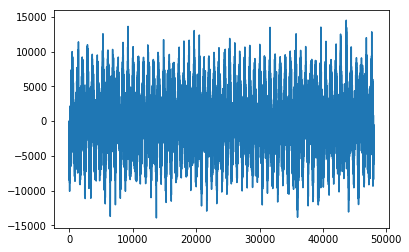

In [66]:
file_name = "./debug_sounds/OrcasoundLab.03.wav"

rate, data = wavfile.read(file_name)
print ("\t Sampling (frame) rate = ", rate)
print("\t Total samples (frames) = ", data.shape)
_ = plt.plot(data,'-', )
plt.show()
ipd.display(ipd.Audio(file_name))

In [67]:
from database_parser import extract_segment_features
from inference import create_network

### This code is copied from live_feed_listener.py 

In [54]:
weights_path = '../w251-orca-detector-data/weights_030513.hdf5'
label_encoder_path = '../w251-orca-detector-data/label_encoder_030513.p'
probability_threshold = 0.6
model_name = orca_params.DEFAULT_MODEL_NAME

inference_with_noise_samples_path='./debug_sounds/'
inference_no_noise_samples_path = './mammal_sounds'

model, encoder = create_network(
        model_name, label_encoder_path, weights_path)

def perform_inference(model,inference_samples_path=inference_with_noise_samples_path):
    
    results = []
    try:
        audio_segments = glob.glob(
            os.path.join(inference_samples_path, '*.wav'))
        if len(audio_segments) == 0:
            print('No audio segments found in {}'.format(
                (inference_samples_path)))
            return results

        end_of_segment = int(
            orca_params.FILE_SAMPLING_SIZE_SECONDS*orca_params.LIVE_FEED_SAMPLING_RATE)

        # The features extraction should not take more than 3 seconds for 3*10 1 second segments
        features = [[segment, extract_segment_features('{}:0:{}'.format(
            (segment), (end_of_segment)))] for segment in audio_segments]

        print('Performing inference for {} audio segments'.format(
            (len(audio_segments))))

        if len(features) == 0:
            return results

        # I'm sure there is a better way to do this
        features = np.array(features)
        x = np.array([i[0] for i in features[:, 1]])
        
        print("Shape of x {}".format(x.shape))

        results = model.predict(x=x,
                                batch_size=orca_params.BATCH_SIZE,
                                verbose=1)
        results = np.array(
            [[encoder.classes_[np.argmax(i)], np.max(i)] for i in results])
        
        print(results)
        # Add the filenames
        file_names = features[:, 0]
        file_names = np.array([os.path.basename(file_name) for file_name in file_names])
        results = np.hstack((file_names.reshape(len(file_names), 1), results))

        results = results[(results[:, [2]].astype(float) > probability_threshold).ravel()
                                   & (results[:, [1]] != orca_params.NOISE_CLASS).ravel()]

    except Exception as e:
        print('Unable to perform inference for {} due to {}'.format(
            (inference_samples_path, str(e))))


Loading trained LabelEncoder from ../w251-orca-detector-data/label_encoder_030513.p
Loading weights from ../w251-orca-detector-data/weights_030513.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 64, 1)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 64, 1)         4         
_________________________________________________________________
conv1 (Conv2D)               (None, 96, 64, 64)        640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 48, 32, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 48, 32, 128)       73856     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 24, 16, 128)       0

## Perform inference with mixed audio files

In [55]:
perform_inference(model)

Performing inference for 10 audio segments
Shape of x (10, 96, 64, 1)
10/10 [==============================] - 0s 13ms/step
[['SpermWhale' '0.8519475']
 ['SpermWhale' '0.8453272']
 ['SpermWhale' '0.9098668']
 ['SpermWhale' '0.92805827']
 ['SpermWhale' '0.7749729']
 ['SpermWhale' '0.90231144']
 ['SpermWhale' '0.8715615']
 ['SpermWhale' '0.9306131']
 ['SpermWhale' '0.8876072']
 ['SpermWhale' '0.84534264']]


## TODO : Perform inference without the mixed audio files
#### Need to split this audio into 1 sec frames first

In [56]:
perform_inference(model,inference_no_noise_samples_path)



Performing inference for 1 audio segments
Shape of x (1, 96, 64, 1)
1/1 [==============================] - 0s 2ms/step
[['SpermWhale' '0.49564365']]
